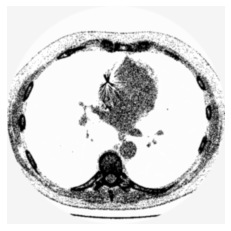

In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./2d_images/ID_0184_Z_0089.tif')
plt.imshow(img, interpolation='bicubic')
plt.axis('off')
plt.show()

In [3]:
!pip3.7 list

Package                       Version   
----------------------------- ----------
absl-py                       0.9.0     
alabaster                     0.7.12    
appnope                       0.1.0     
astor                         0.8.1     
attrs                         19.3.0    
Babel                         2.8.0     
backcall                      0.1.0     
beautifulsoup4                4.8.2     
bleach                        3.1.0     
bs4                           0.0.1     
cachetools                    4.0.0     
certifi                       2019.11.28
chardet                       3.0.4     
Click                         7.0       
cycler                        0.10.0    
decorator                     4.4.1     
defusedxml                    0.6.0     
docutils                      0.16      
entrypoints                   0.3       
Flask                         1.1.1     
gast                          0.2.2     
google-auth                   1.10.0    
google-auth-oaut

In [7]:
import sys
print(sys.version)

3.7.2 (default, Dec 27 2018, 07:35:06) 
[Clang 10.0.0 (clang-1000.11.45.5)]


https://www.kaggle.com/kmader/finding-lungs-in-ct-data

In [1]:
!ls

2d_images            3d_images            kaggle_lung_ct.ipynb
2d_masks             README.md            lung_stats.csv


In [2]:
import pandas as pd
pd.read_csv('lung_stats.csv')

,img_id,lung_area_px,lung_area_mm2,lung_volume_fraction,lung_mean_hu,lung_pd95_hu,lung_pd05_hu
0,ID_0000_Z_0142.tif,57342,40318.593750,0.218742,-644.750671,-368.00,-798.0
1,ID_0001_Z_0146.tif,95955,67468.359375,0.366039,-720.042978,-544.00,-847.0
2,ID_0002_Z_0162.tif,60782,42737.343750,0.231865,-616.722632,-294.00,-777.0
3,ID_0003_Z_0132.tif,52852,37161.562500,0.201614,-664.036441,-267.55,-851.0
4,ID_0004_Z_0066.tif,81260,57135.937500,0.309982,-675.347969,-295.00,-842.0
...,...,...,...,...,...,...,...
262,ID_0262_Z_0064.tif,60734,42703.593750,0.231682,-677.077502,-387.65,-849.0
263,ID_0263_Z_0093.tif,76063,53481.796875,0.290157,-685.681304,-407.00,-834.0
264,ID_0264_Z_0080.tif,42364,29787.187500,0.161606,-545.503376,-182.00,-823.0
265,ID_0265_Z_0063.tif,63944,44960.625000,0.243927,-676.283076,-348.00,-840.0


In [6]:
img

array([[[245, 245, 245],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       ...,

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [245, 245, 245],
        [246, 246, 246]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]]

In [7]:
type(img)

numpy.ndarray

In [8]:
import numpy as np

np.max(img)

255

In [9]:
np.min(img)

0

In [10]:
np.shape(img)

(512, 512, 3)

In [23]:
IMAGE_LIB = './2d_images/'
MASK_LIB = './2d_masks/'
IMG_HEIGHT, IMG_WIDTH = 32, 32
SEED = 42

In [26]:
import cv2
import os

all_images = [x for x in sorted(os.listdir(IMAGE_LIB)) if x[-4:] == '.tif']
all_images2 = [x for x in sorted(os.listdir(MASK_LIB)) if x[-4:] == '.tif']

x_data = np.empty((len(all_images), IMG_HEIGHT, IMG_WIDTH), dtype='float32')
for i, name in enumerate(all_images):
    im = cv2.imread(IMAGE_LIB+name, cv2.IMREAD_UNCHANGED).astype("int16").astype("float32")
    im = cv2.resize(im, dsize=(IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_LANCZOS4)
    im = (im-np.min(im))/(np.max(im)-np.min(im))
    x_data[i] = im
y_data = np.empty((len(all_images), IMG_HEIGHT, IMG_WIDTH), dtype='float32')
for i, name in enumerate(all_images2):
    im = cv2.imread(MASK_LIB+name, cv2.IMREAD_UNCHANGED).astype('float32')/255.
    im = cv2.resize(im, dsize=(IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_NEAREST)
    y_data[i] = im

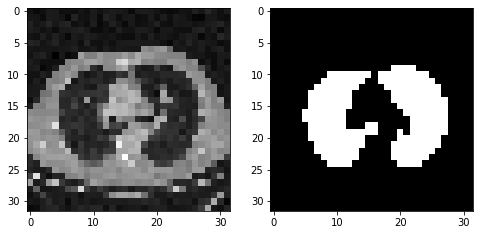

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].imshow(x_data[0], cmap='gray')
ax[1].imshow(y_data[0], cmap='gray')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

x_data = x_data[:,:,:, np.newaxis]
y_data = y_data[:,:,:, np.newaxis]
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.5)

In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [38]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f*y_pred_f)
    return (2. * intersection + K.epsilon()) /(K.sum(y_true_f)+K.sum(y_pred_f)+K.epsilon())


In [31]:
input_layer = Input(shape=x_train.shape[1:])
c1 = Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(input_layer)
l = MaxPool2D(strides=(2,2))(c1)
c2 = Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(l)
l = MaxPool2D(strides=(2,2))(c2)
c3 = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(l)
l = MaxPool2D(strides=(2,2))(c3)
c4 = Conv2D(filters=32, kernel_size=(1,1), activation='relu', padding='same')(l)
l = concatenate([UpSampling2D(size=(2,2))(c4), c3], axis=-1)
l = Conv2D(filters=32, kernel_size=(2,2), activation='relu', padding='same')(l)
l = concatenate([UpSampling2D(size=(2,2))(l), c2], axis=-1)
l = Conv2D(filters=24, kernel_size=(2,2), activation='relu', padding='same')(l)
l = concatenate([UpSampling2D(size=(2,2))(l), c1], axis=-1)
l = Conv2D(filters=16, kernel_size=(2,2), activation='relu', padding='same')(l)
l = Conv2D(filters=64, kernel_size=(1,1), activation='relu')(l)
l = Dropout(0.5)(l)
output_layer = Conv2D(filters=1, kernel_size=(1,1), activation='sigmoid')(l)
                                                         
model = Model(input_layer, output_layer)

In [32]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 8)    80          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 16, 16, 8)    0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 16, 16, 16)   1168        max_pooling2d[0][0]              
______________________________________________________________________________________________

In [33]:
def my_generator(x_train, y_train, batch_size):
    data_generator = ImageDataGenerator(
            width_shift_range=0.1,
            height_shift_range=0.1,
            rotation_range=10,
            zoom_range=0.1).flow(x_train, x_train, batch_size, seed=SEED)
    mask_generator = ImageDataGenerator(
            width_shift_range=0.1,
            height_shift_range=0.1,
            rotation_range=10,
            zoom_range=0.1).flow(y_train, y_train, batch_size, seed=SEED)
    while True:
        x_batch, _ = data_generator.next()
        y_batch, _ = mask_generator.next()
        yield x_batch, y_batch

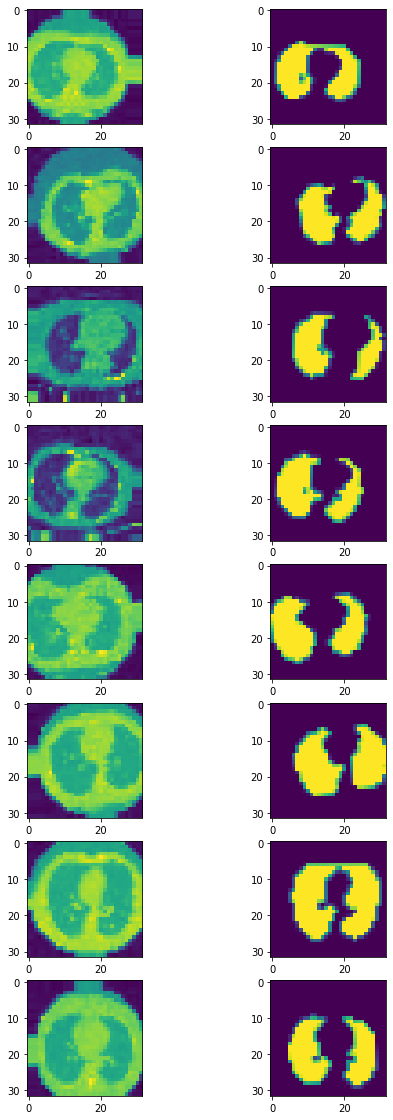

In [34]:
image_batch, mask_batch = next(my_generator(x_train, y_train, 8))
fix, ax = plt.subplots(8,2, figsize=(8,20))
for i in range(8):
    ax[i,0].imshow(image_batch[i,:,:,0])
    ax[i,1].imshow(mask_batch[i,:,:,0])
plt.show()

In [39]:
model.compile(optimizer=Adam(2e-4), loss='binary_crossentropy', metrics=[dice_coef])

In [40]:
weight_saver = ModelCheckpoint('lung.h5', monitor='val_dice_coef', 
                                              save_best_only=True, save_weights_only=True)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8 ** x)

In [41]:
hist = model.fit_generator(my_generator(x_train, y_train, 8),
                           steps_per_epoch = 200,
                           validation_data = (x_val, y_val),
                           epochs=10, verbose=2,
                           callbacks = [weight_saver, annealer])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 200 steps, validate on 134 samples
Epoch 1/10
200/200 - 10s - loss: 0.3579 - dice_coef: 0.5041 - val_loss: 0.1571 - val_dice_coef: 0.8163
Epoch 2/10
200/200 - 9s - loss: 0.1525 - dice_coef: 0.8008 - val_loss: 0.1333 - val_dice_coef: 0.8505
Epoch 3/10
200/200 - 9s - loss: 0.1370 - dice_coef: 0.8222 - val_loss: 0.1187 - val_dice_coef: 0.8634
Epoch 4/10
200/200 - 9s - loss: 0.1306 - dice_coef: 0.8326 - val_loss: 0.1163 - val_dice_coef: 0.8723
Epoch 5/10
200/200 - 8s - loss: 0.1252 - dice_coef: 0.8397 - val_loss: 0.1112 - val_dice_coef: 0.8721
Epoch 6/10
200/200 - 8s - loss: 0.1205 - dice_coef: 0.8440 - val_loss: 0.1130 - val_dice_coef: 0.8752
Epoch 7/10
200/200 - 8s - loss: 0.1191 - dice_coef: 0.8464 - val_loss: 0.1108 - val_dice_coef: 0.8783
Epoch 8/10
200/200 - 8s - loss: 0.1170 - dice_coef: 0.8482 - val_loss: 0.1120 - val_dice_coef: 0.8792
Epoch 9/10
200/200 - 8s - loss: 0.117

In [42]:
model.load_weights('lung.h5')

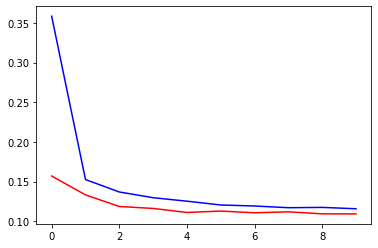

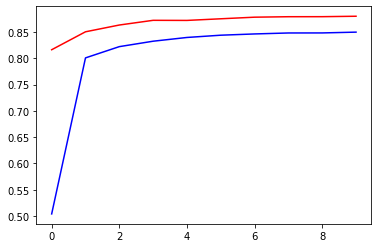

In [43]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['dice_coef'], color='b')
plt.plot(hist.history['val_dice_coef'], color='r')
plt.show()

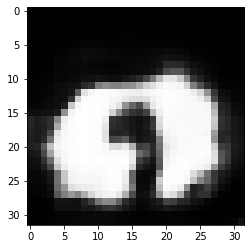

In [44]:
plt.imshow(model.predict(x_train[0].reshape(1,IMG_HEIGHT, IMG_WIDTH, 1))[0,:,:,0], cmap='gray')

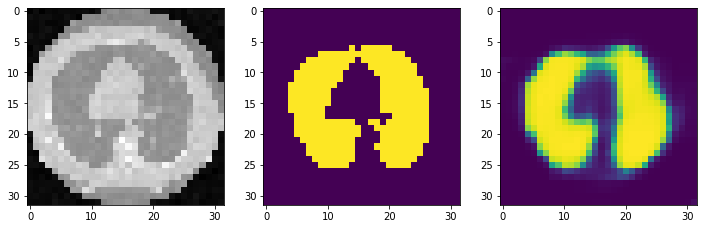

In [45]:
y_hat = model.predict(x_val)
fig, ax = plt.subplots(1,3,figsize=(12,6))
ax[0].imshow(x_val[0,:,:,0], cmap='gray')
ax[1].imshow(y_val[0,:,:,0])
ax[2].imshow(y_hat[0,:,:,0])